# Breast Cancer Prediction

## import required modules

In [23]:
import numpy as np

In [24]:
import pandas as pd

In [48]:
from matplotlib import pyplot as plt

In [50]:
import seaborn as sns

In [51]:
import warnings as wr
wr.filterwarnings("ignore")

# loading dataset

In [55]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"


In [56]:
column_names = ['id', 'clump_thickness', 'uniform_cell_size', 'uniform_cell_shape',
       'marginal_adhesion', 'single_epithelial_size', 'bare_nuclei',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class']

In [57]:
df = pd.read_csv(url, names=column_names)

In [58]:
df

,id,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epithelial_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [59]:
df["class"].value_counts()

2    458
4    241
Name: class, dtype: int64

In [60]:
df.isnull().sum()

id                        0
clump_thickness           0
uniform_cell_size         0
uniform_cell_shape        0
marginal_adhesion         0
single_epithelial_size    0
bare_nuclei               0
bland_chromatin           0
normal_nucleoli           0
mitoses                   0
class                     0
dtype: int64

In [61]:
df.describe()

,id,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epithelial_size,bland_chromatin,normal_nucleoli,mitoses,class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   id                      699 non-null    int64 
 1   clump_thickness         699 non-null    int64 
 2   uniform_cell_size       699 non-null    int64 
 3   uniform_cell_shape      699 non-null    int64 
 4   marginal_adhesion       699 non-null    int64 
 5   single_epithelial_size  699 non-null    int64 
 6   bare_nuclei             699 non-null    object
 7   bland_chromatin         699 non-null    int64 
 8   normal_nucleoli         699 non-null    int64 
 9   mitoses                 699 non-null    int64 
 10  class                   699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [64]:
df.columns

Index(['id', 'clump_thickness', 'uniform_cell_size', 'uniform_cell_shape',
       'marginal_adhesion', 'single_epithelial_size', 'bare_nuclei',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class'],
      dtype='object')

In [66]:
df.drop(["id"],axis=1,inplace=True)

In [67]:
df

,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epithelial_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1,2
695,2,1,1,1,2,1,1,1,1,2
696,5,10,10,3,7,3,8,10,2,4
697,4,8,6,4,3,4,10,6,1,4


## Visualization

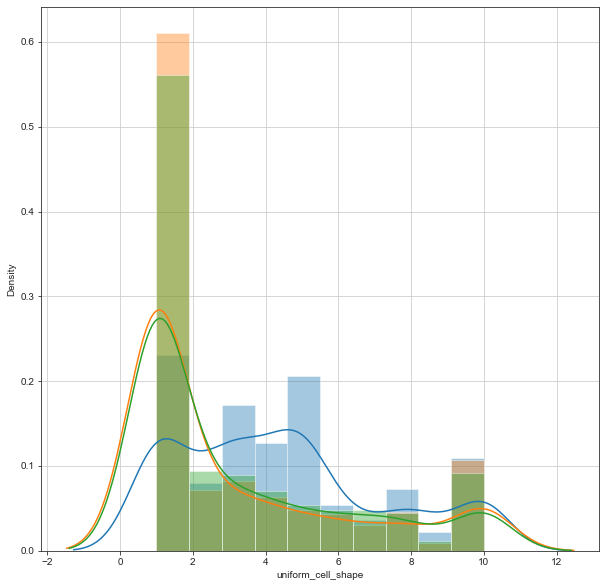

In [92]:
plt.figure(figsize=(10,10))
sns.distplot(df["clump_thickness"])
sns.distplot(df["uniform_cell_size"])
sns.distplot(df["uniform_cell_shape"])
plt.grid(True)

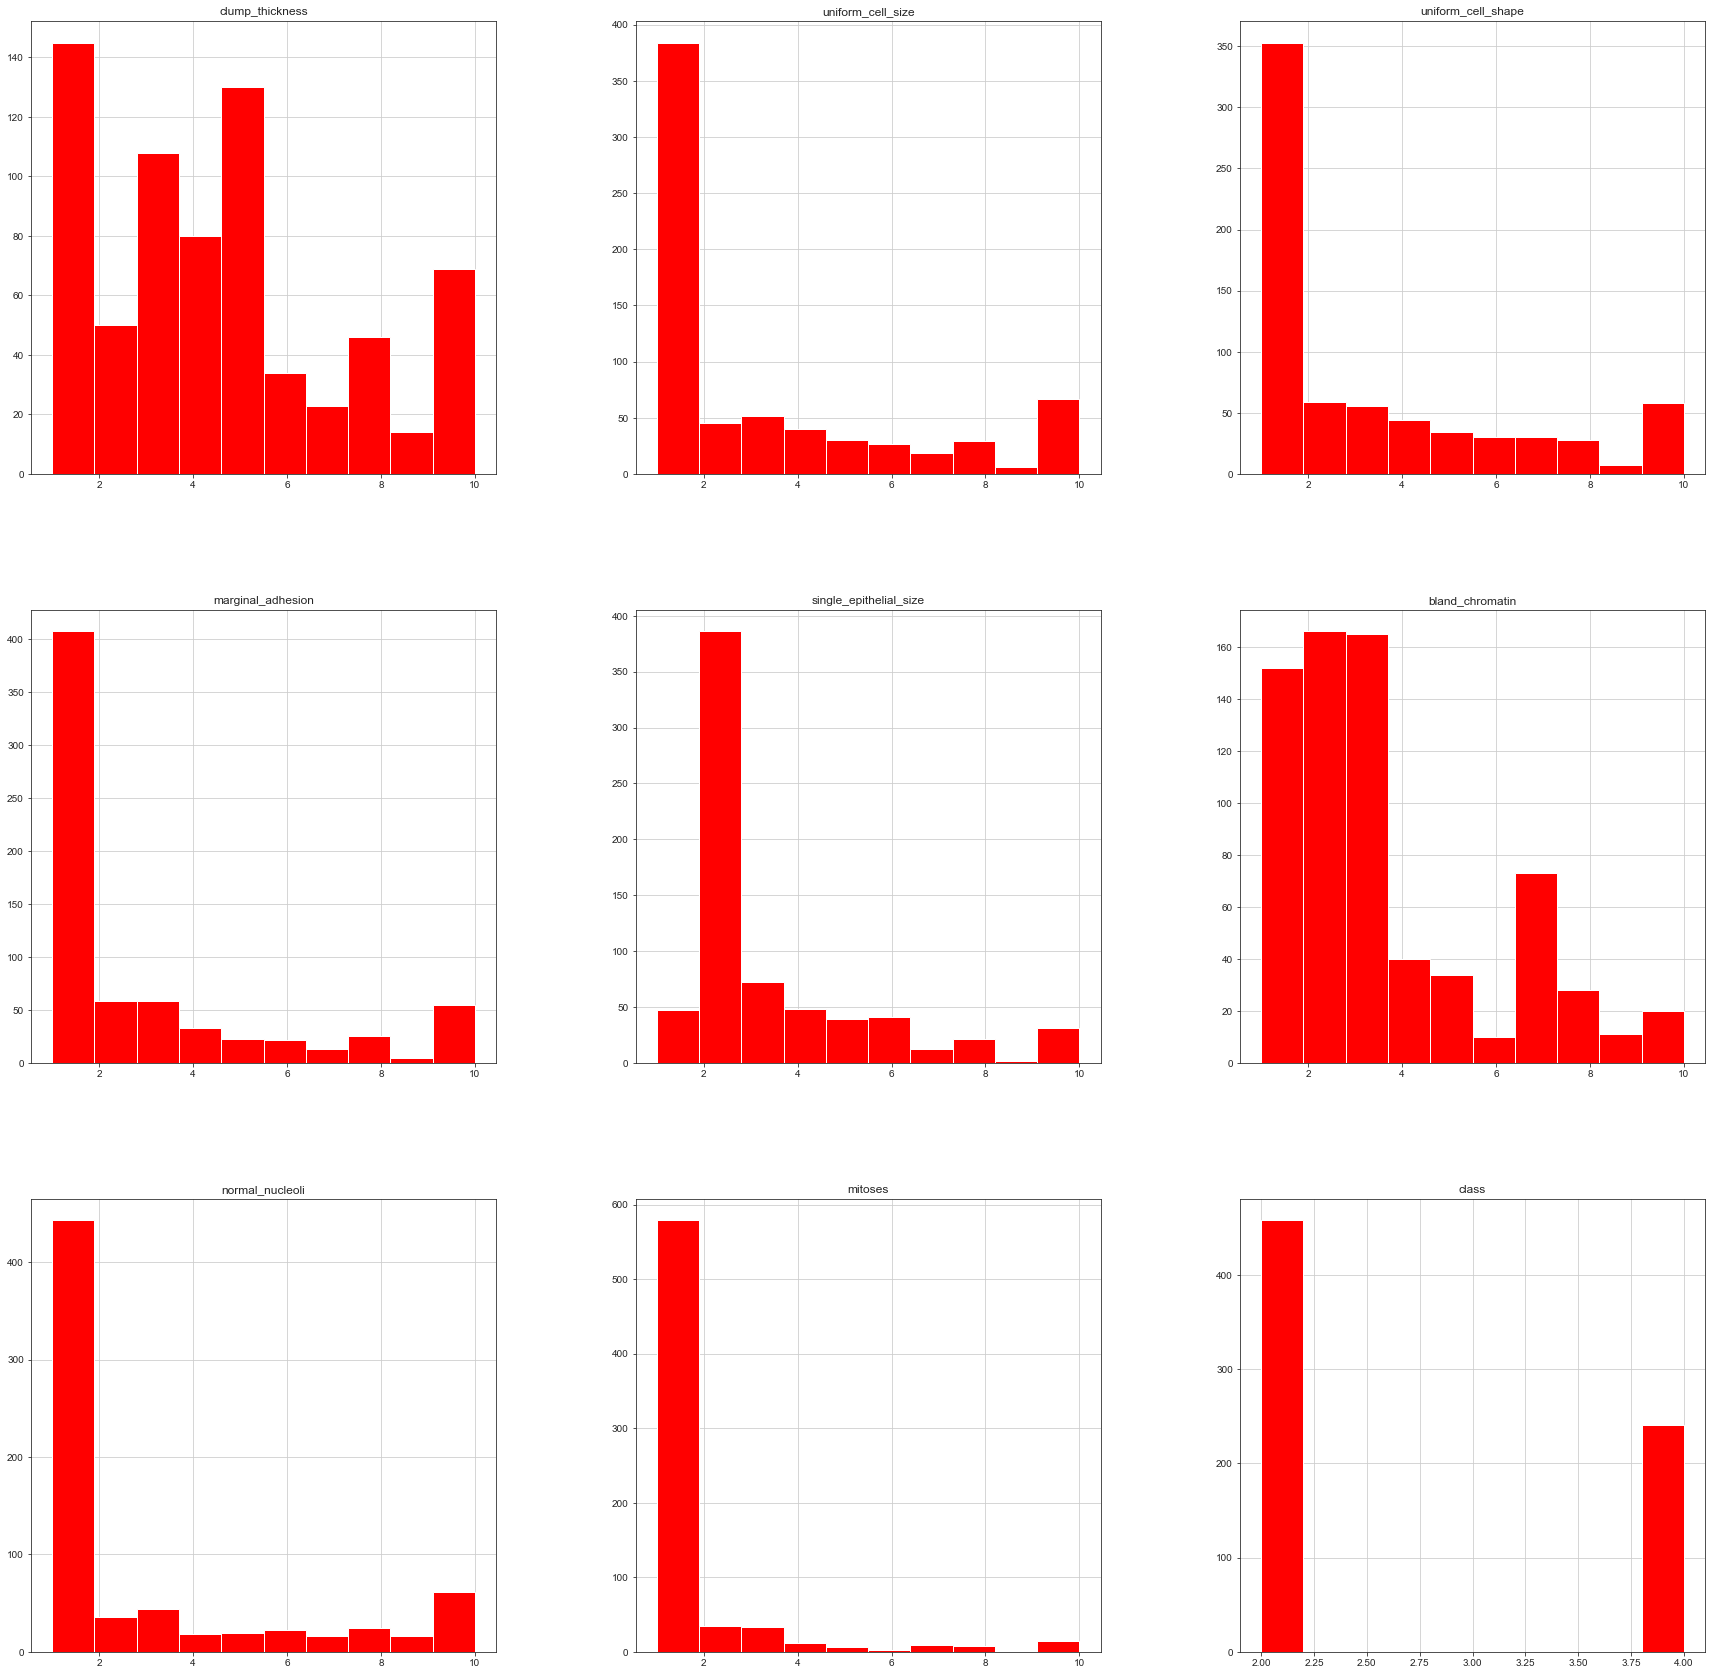

In [72]:
sns.set_style('ticks')
df.hist(figsize=(30,30),color="red")
plt.show()

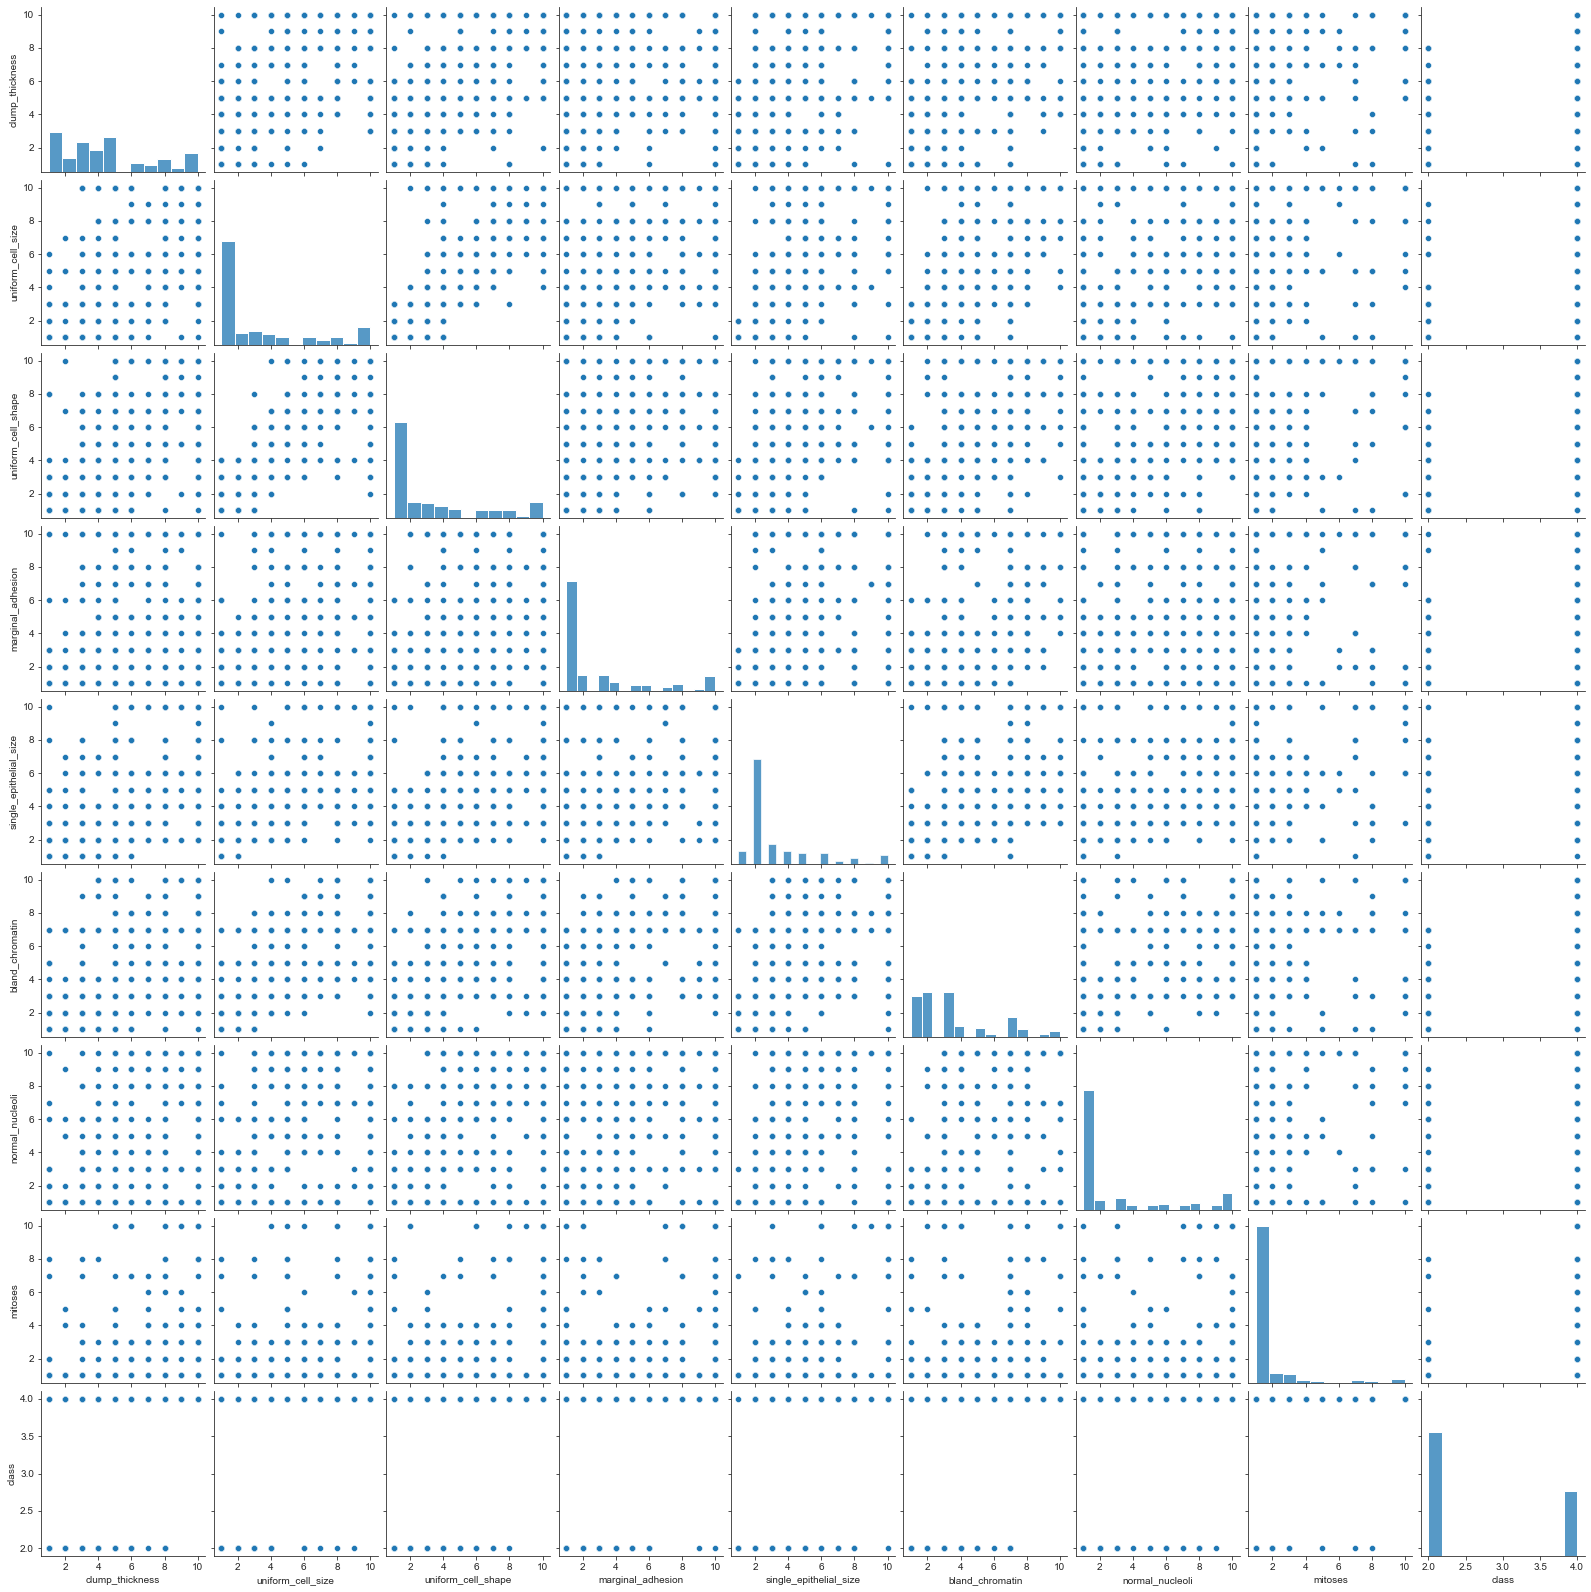

In [94]:
sns.pairplot(df)

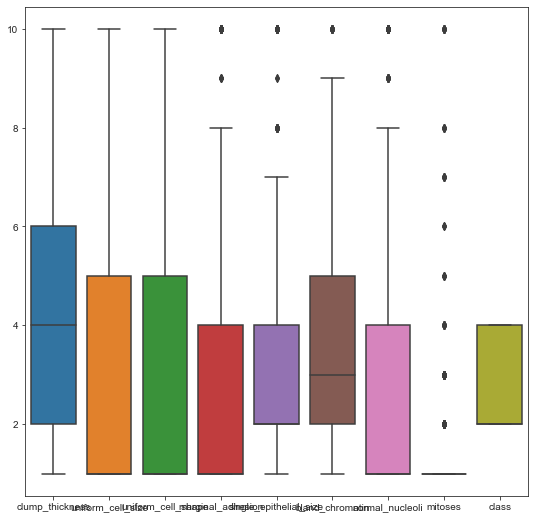

In [99]:

plt.figure(figsize=(9,9))
sns.boxplot(data=df)
plt.show()

In [100]:
df.corr()

,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epithelial_size,bland_chromatin,normal_nucleoli,mitoses,class
clump_thickness,1.000000,0.644913,0.654589,0.486356,0.521816,0.558428,0.535835,0.350034,0.716001
uniform_cell_size,0.644913,1.000000,0.906882,0.705582,0.751799,0.755721,0.722865,0.458693,0.817904
uniform_cell_shape,0.654589,0.906882,1.000000,0.683079,0.719668,0.735948,0.719446,0.438911,0.818934
marginal_adhesion,0.486356,0.705582,0.683079,1.000000,0.599599,0.666715,0.603352,0.417633,0.696800
single_epithelial_size,0.521816,0.751799,0.719668,0.599599,1.000000,0.616102,0.628881,0.479101,0.682785
bland_chromatin,0.558428,0.755721,0.735948,0.666715,0.616102,1.000000,0.665878,0.344169,0.756616
normal_nucleoli,0.535835,0.722865,0.719446,0.603352,0.628881,0.665878,1.000000,0.428336,0.712244
mitoses,0.350034,0.458693,0.438911,0.417633,0.479101,0.344169,0.428336,1.000000,0.423170
class,0.716001,0.817904,0.818934,0.696800,0.682785,0.756616,0.712244,0.423170,1.000000


<AxesSubplot:xlabel='class', ylabel='count'>

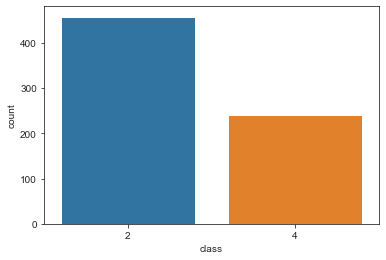

In [101]:
sns.countplot(df["class"])

In [103]:
# now we spliting data into x & y

x=df.drop(["class"],axis=1)
y=df["class"]

In [124]:
x["bare_nuclei"].value_counts()

1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: bare_nuclei, dtype: int64

In [125]:
# now replace the "?" as nan value

In [129]:
null_values=df[df["bare_nuclei"]=="?"]
df["bare_nuclei"] = df["bare_nuclei"].replace('?',np.nan)


In [130]:
x=df.drop(["class"],axis=1)

In [152]:
x["bare_nuclei"].value_counts().idxmax()

1.0

In [167]:
x["bare_nuclei"]=x["bare_nuclei"].fillna(x["bare_nuclei"].value_counts().idxmax())

In [168]:
x=x.astype("float")
y=y.astype("float")

In [169]:
from sklearn.model_selection import train_test_split

In [170]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=1)

In [171]:
x_train

,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epithelial_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses
617,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
107,1.0,6.0,8.0,10.0,8.0,10.0,5.0,7.0,1.0
17,4.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0
441,5.0,2.0,2.0,4.0,2.0,4.0,1.0,1.0,1.0
365,2.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...
144,2.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0
645,3.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0
72,1.0,3.0,3.0,2.0,2.0,1.0,7.0,2.0,1.0
235,3.0,1.0,4.0,1.0,2.0,1.0,3.0,1.0,1.0


In [172]:
y_train

617    2.0
107    4.0
17     2.0
441    2.0
365    2.0
      ... 
144    2.0
645    2.0
72     2.0
235    2.0
37     2.0
Name: class, Length: 559, dtype: float64

In [173]:
from xgboost import XGBClassifier

In [174]:
xgb=XGBClassifier(booster='gbtree',learning_rate=0.300000012,gamma=0,base_score=0.5,n_estimators=100,verbosity=1)

In [175]:
xgb.fit(x_train,y_train)

[21:28:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=1)

In [176]:
xgb.score(x_test,y_test)

0.9571428571428572

In [177]:
from sklearn.linear_model import LogisticRegression

In [178]:
Lr=LogisticRegression()

In [179]:
Lr.fit(x_train,y_train)

LogisticRegression()

In [180]:
Lr.score(x_test,y_test)

0.9785714285714285

In [181]:
from sklearn.svm import SVC

In [185]:
svc=SVC(kernel="rbf")

In [186]:
svc.fit(x_train,y_train)

SVC()

In [187]:
svc.score(x_test,y_test)

0.9785714285714285

In [188]:
def model(model):
    algorithm=model.fit(x_train,y_train)
    accuracy=model.score(x_test,y_test)
    
    print("-----"*15)
    print("the {} gives {} accuracy".format(algorithm,accuracy))
    print("-----"*15)

In [189]:
 model(svc)

---------------------------------------------------------------------------
the SVC() gives 0.9785714285714285 accuracy
---------------------------------------------------------------------------


In [190]:
model(Lr)

---------------------------------------------------------------------------
the LogisticRegression() gives 0.9785714285714285 accuracy
---------------------------------------------------------------------------


In [191]:
model(xgb)

[21:31:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
---------------------------------------------------------------------------
the XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_pa

In [192]:
# cross validation 

from sklearn.model_selection import cross_val_score

In [193]:
cross_val_score(Lr,x_train,y_train,cv=10)

array([0.98214286, 0.94642857, 0.98214286, 0.98214286, 0.94642857,
       0.98214286, 1.        , 0.92857143, 0.94642857, 0.92727273])

In [194]:
np.mean(cross_val_score(Lr,x_train,y_train,cv=10))

0.9623701298701299

In [195]:
cross_val_score(xgb,x_train,y_train,cv=10)

[21:32:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:32:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:32:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:32:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

array([0.96428571, 0.92857143, 0.98214286, 0.96428571, 0.92857143,
       1.        , 1.        , 0.92857143, 0.92857143, 0.90909091])

In [196]:
np.mean(cross_val_score(xgb,x_train,y_train,cv=10))

[21:32:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:32:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:32:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:32:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

0.9534090909090909

In [197]:
cross_val_score(svc,x_train,y_train,cv=10)

array([0.98214286, 0.94642857, 0.98214286, 0.94642857, 0.94642857,
       0.96428571, 1.        , 0.94642857, 0.96428571, 0.94545455])

In [199]:
np.mean(cross_val_score(svc,x_train,y_train,cv=10))

0.9624025974025973

In [200]:
predictions=xgb.predict(x_test)

In [201]:
predictions

array([2., 2., 2., 4., 2., 2., 4., 2., 2., 2., 4., 4., 2., 2., 4., 4., 2.,
       2., 2., 2., 2., 2., 4., 2., 4., 2., 4., 4., 2., 2., 2., 4., 4., 4.,
       4., 4., 2., 4., 2., 2., 2., 2., 2., 2., 2., 4., 2., 2., 2., 2., 2.,
       2., 4., 2., 4., 4., 4., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 4.,
       2., 2., 2., 2., 2., 2., 2., 4., 2., 2., 2., 2., 4., 4., 2., 4., 2.,
       2., 2., 4., 4., 2., 4., 2., 2., 2., 2., 4., 2., 2., 2., 2., 2., 4.,
       4., 2., 2., 4., 4., 2., 4., 2., 4., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 4., 4., 4., 2., 4., 2., 4., 2., 2., 2., 4., 4., 2., 4., 2.,
       2., 2., 4., 4.])

metrics evaluation

In [202]:
from sklearn.metrics import classification_report,accuracy_score

In [203]:
accuracy_score(predictions,y_test)

0.9571428571428572

In [204]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         2.0       0.96      0.98      0.97        92
         4.0       0.96      0.92      0.94        48

    accuracy                           0.96       140
   macro avg       0.96      0.95      0.95       140
weighted avg       0.96      0.96      0.96       140



In [205]:
from sklearn.metrics import confusion_matrix

In [206]:
confusion_matrix(y_test,predictions)

array([[90,  2],
       [ 4, 44]], dtype=int64)

In [207]:
pred=confusion_matrix(y_test,predictions)

<AxesSubplot:>

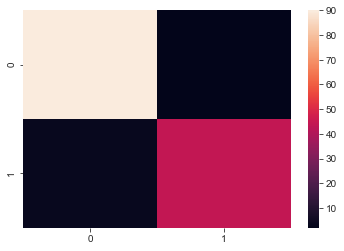

In [208]:
sns.heatmap(confusion_matrix(y_test,predictions))

In [209]:
import pickle

In [210]:
pickle.dump(xgb,open("cancer.pkl","wb"))

In [211]:
model=pickle.load(open("cancer.pkl","rb"))

In [212]:
data=x_test.iloc[1]

In [214]:
from numpy import asarray

In [215]:
new_data=asarray([data])

In [218]:
y_pred=model.predict(new_data)

In [219]:
if y_pred[0]==2:
    print("not suffer from breast cancer")
else:
    print("suffer from breast cancer")

not suffer from breast cancer


In [220]:
# actual & predicted values

In [222]:
new_df=pd.DataFrame({"actual":y_test,"predicted":predictions})

In [223]:
new_df


,actual,predicted
584,2.0,2.0
417,2.0,2.0
606,2.0,2.0
349,4.0,4.0
134,2.0,2.0
...,...,...
426,2.0,2.0
119,2.0,2.0
82,2.0,2.0
329,4.0,4.0


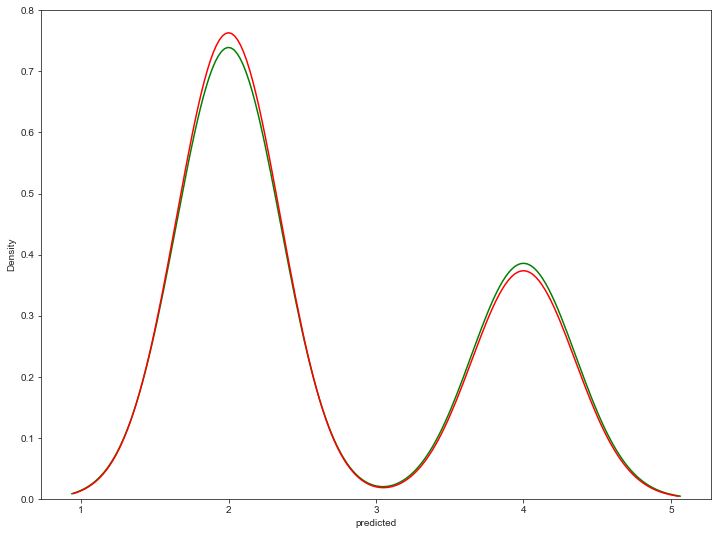

In [248]:
plt.figure(figsize=(12,9))

p=sns.distplot(new_df["actual"],hist=False,color="green")

q=sns.distplot(new_df["predicted"],color="red",hist=False)
